In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob

# **image Preprocess**

In [2]:
images_path = 'input/Flicker8k_Dataset/'
images = glob(images_path+'*.jpg')
len(images)

8091

In [3]:
images[:5]

['input/Flicker8k_Dataset\\1000268201_693b08cb0e.jpg',
 'input/Flicker8k_Dataset\\1001773457_577c3a7d70.jpg',
 'input/Flicker8k_Dataset\\1002674143_1b742ab4b8.jpg',
 'input/Flicker8k_Dataset\\1003163366_44323f5815.jpg',
 'input/Flicker8k_Dataset\\1007129816_e794419615.jpg']

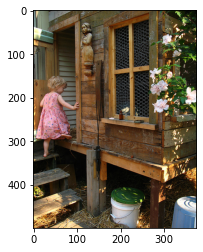

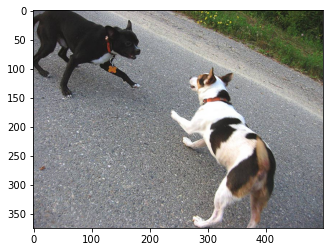

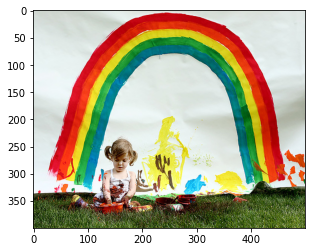

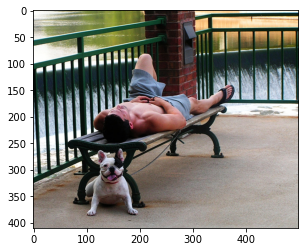

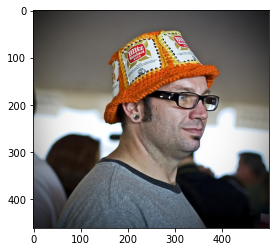

In [4]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [6]:
from keras.applications import ResNet50

incept_model = ResNet50(include_top=True)

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [8]:
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)
        
    im_name = i.split('/')[-1]
    img_name=im_name[18:43]
    
    images_features[img_name] = pred
    
    count += 1
    
    if count > 1499:
        break
        
    elif count % 50 == 0:
        print(count)
    
        
    

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450


In [9]:
images[0].split('/')[-1]

'Flicker8k_Dataset\\1000268201_693b08cb0e.jpg'

In [10]:
img_name

'2308108566_2cba6bca53.jpg'

In [11]:
len(images_features)

1500

In [12]:
images_features

{'1000268201_693b08cb0e.jpg': array([0.11729115, 0.41350725, 0.00492116, ..., 0.1162867 , 0.41539803,
        1.1421622 ], dtype=float32),
 '1001773457_577c3a7d70.jpg': array([1.2365468 , 0.9407366 , 0.22728986, ..., 0.35339004, 0.02746796,
        0.22555988], dtype=float32),
 '1002674143_1b742ab4b8.jpg': array([1.4471188 , 0.82883275, 0.        , ..., 0.        , 1.0879703 ,
        0.3984207 ], dtype=float32),
 '1003163366_44323f5815.jpg': array([0.807912  , 0.08295085, 0.69337225, ..., 0.30532148, 0.00407869,
        0.        ], dtype=float32),
 '1007129816_e794419615.jpg': array([0.31199795, 2.0393145 , 0.        , ..., 0.16161737, 0.        ,
        0.1933717 ], dtype=float32),
 '1007320043_627395c3d8.jpg': array([1.5337269 , 0.6456284 , 0.09265219, ..., 0.        , 0.25073645,
        0.00375553], dtype=float32),
 '1009434119_febe49276a.jpg': array([0.3195499 , 0.28481966, 0.36598676, ..., 0.29806128, 0.07254042,
        0.06880677], dtype=float32),
 '1012212859_01547e3f17.jpg

# **Text Preprocess**

In [13]:
caption_path = 'input/Flickr_8k_text/Flickr8k.token.txt'

In [14]:
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [15]:
captions

['1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg#0\tA black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg#1\tA black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg#2\tA black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg#3\tTwo dogs of different breeds looking at each other on the road .',
 '1001773457_577c3a7d70.jpg#4\tTwo dogs on pavement moving toward each other .',
 '1002674143_1b742ab4b8.jpg#0\tA little girl covered in paint sits in front of a pai

In [16]:
len(captions)

40461

In [17]:
captions[0].split('\t')[0][:-2]

'1000268201_693b08cb0e.jpg'

In [18]:
captions[0].split('\t')[1]

'A child in a pink dress is climbing up a set of stairs in an entry way .'

In [19]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2] 
        caption = i.split('\t')[1]
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)
            
    except:
        pass

In [20]:
captions_dict

{'1000268201_693b08cb0e.jpg': ['A child in a pink dress is climbing up a set of stairs in an entry way .',
  'A girl going into a wooden building .',
  'A little girl climbing into a wooden playhouse .',
  'A little girl climbing the stairs to her playhouse .',
  'A little girl in a pink dress going into a wooden cabin .'],
 '1001773457_577c3a7d70.jpg': ['A black dog and a spotted dog are fighting',
  'A black dog and a tri-colored dog playing with each other on the road .',
  'A black dog and a white dog with brown spots are staring at each other in the street .',
  'Two dogs of different breeds looking at each other on the road .',
  'Two dogs on pavement moving toward each other .'],
 '1002674143_1b742ab4b8.jpg': ['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .',
  'A little girl is sitting in front of a large painted rainbow .',
  'A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .',
  'T

In [21]:
len(captions_dict)

1500

# **Visualize Images with captions**

In [22]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img_name = images[i]
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)

KeyError: 'Flicker8k_Dataset\\1000268201_693b08cb0e.jpg'

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

for k in images_features.keys():
    plt.figure()
    
    img_name = 'input/Flicker8k_Dataset/' + k
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)
    
    break

In [23]:

def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified
    

In [24]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

# **Create Vocabulary**

In [25]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1

In [26]:
len(count_words)

3988

In [27]:
count_words

{'startofseq': 7499,
 'a': 11935,
 'child': 338,
 'in': 3468,
 'pink': 153,
 'dress': 61,
 'is': 1800,
 'climbing': 151,
 'up': 281,
 'set': 15,
 'of': 1224,
 'stairs': 13,
 'an': 454,
 'entry': 0,
 'way': 20,
 '.': 6786,
 'endofseq': 7499,
 'girl': 710,
 'going': 23,
 'into': 257,
 'wooden': 57,
 'building': 68,
 'little': 417,
 'playhouse': 1,
 'the': 3459,
 'to': 655,
 'her': 238,
 'cabin': 1,
 'black': 748,
 'dog': 1707,
 'and': 1648,
 'spotted': 7,
 'are': 580,
 'fighting': 17,
 'tri-colored': 5,
 'playing': 365,
 'with': 1497,
 'each': 75,
 'other': 137,
 'on': 2055,
 'road': 78,
 'white': 674,
 'brown': 509,
 'spots': 4,
 'staring': 10,
 'at': 581,
 'street': 161,
 'two': 1005,
 'dogs': 428,
 'different': 6,
 'breeds': 3,
 'looking': 162,
 'pavement': 9,
 'moving': 6,
 'toward': 22,
 'covered': 72,
 'paint': 3,
 'sits': 129,
 'front': 261,
 'painted': 13,
 'rainbow': 6,
 'hands': 46,
 'bowl': 3,
 'sitting': 249,
 'large': 240,
 'small': 277,
 'grass': 317,
 'plays': 116,
 'finge

In [28]:
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1
        

In [29]:
new_dict

{'startofseq': 1,
 'a': 2,
 'child': 3,
 'in': 4,
 'pink': 5,
 'dress': 6,
 'is': 7,
 'climbing': 8,
 'up': 9,
 'set': 10,
 'of': 11,
 'stairs': 12,
 'an': 13,
 'entry': 14,
 'way': 15,
 '.': 16,
 'endofseq': 17,
 'girl': 18,
 'going': 19,
 'into': 20,
 'wooden': 21,
 'building': 22,
 'little': 23,
 'playhouse': 24,
 'the': 25,
 'to': 26,
 'her': 27,
 'cabin': 28,
 'black': 29,
 'dog': 30,
 'and': 31,
 'spotted': 32,
 'are': 33,
 'fighting': 34,
 'tri-colored': 35,
 'playing': 36,
 'with': 37,
 'each': 38,
 'other': 39,
 'on': 40,
 'road': 41,
 'white': 42,
 'brown': 43,
 'spots': 44,
 'staring': 45,
 'at': 46,
 'street': 47,
 'two': 48,
 'dogs': 49,
 'different': 50,
 'breeds': 51,
 'looking': 52,
 'pavement': 53,
 'moving': 54,
 'toward': 55,
 'covered': 56,
 'paint': 57,
 'sits': 58,
 'front': 59,
 'painted': 60,
 'rainbow': 61,
 'hands': 62,
 'bowl': 63,
 'sitting': 64,
 'large': 65,
 'small': 66,
 'grass': 67,
 'plays': 68,
 'fingerpaints': 69,
 'canvas': 70,
 'it': 71,
 'there': 

In [30]:
len(new_dict)

3988

In [31]:
new_dict['<OUT>'] = len(new_dict) 

In [32]:
captions_backup = captions_dict.copy()

In [33]:
captions_dict = captions_backup.copy()

In [34]:
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])


        captions_dict[k][vv.index(v)] = encoded

In [35]:
captions_dict

{'1000268201_693b08cb0e.jpg': [[1,
   2,
   3,
   4,
   2,
   5,
   6,
   7,
   8,
   9,
   2,
   10,
   11,
   12,
   4,
   13,
   14,
   15,
   16,
   17],
  [1, 2, 18, 19, 20, 2, 21, 22, 16, 17],
  [1, 2, 23, 18, 8, 20, 2, 21, 24, 16, 17],
  [1, 2, 23, 18, 8, 25, 12, 26, 27, 24, 16, 17],
  [1, 2, 23, 18, 4, 2, 5, 6, 19, 20, 2, 21, 28, 16, 17]],
 '1001773457_577c3a7d70.jpg': [[1, 2, 29, 30, 31, 2, 32, 30, 33, 34, 17],
  [1, 2, 29, 30, 31, 2, 35, 30, 36, 37, 38, 39, 40, 25, 41, 16, 17],
  [1,
   2,
   29,
   30,
   31,
   2,
   42,
   30,
   37,
   43,
   44,
   33,
   45,
   46,
   38,
   39,
   4,
   25,
   47,
   16,
   17],
  [1, 48, 49, 11, 50, 51, 52, 46, 38, 39, 40, 25, 41, 16, 17],
  [1, 48, 49, 40, 53, 54, 55, 38, 39, 16, 17]],
 '1002674143_1b742ab4b8.jpg': [[1,
   2,
   23,
   18,
   56,
   4,
   57,
   58,
   4,
   59,
   11,
   2,
   60,
   61,
   37,
   27,
   62,
   4,
   2,
   63,
   16,
   17],
  [1, 2, 23, 18, 7, 64, 4, 59, 11, 2, 65, 60, 61, 16, 17],
  [1,
   2,
   6

------------------------------------------------------------------------------------------------------

# **Build Generator Function**

In [36]:
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

In [37]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 2, 5, 6, 7, 8, 9, 2, 10, 11, 12, 4, 13, 14, 15, 16, 17]
[1, 2, 29, 30, 31, 2, 42, 30, 37, 43, 44, 33, 45, 46, 38, 39, 4, 25, 47, 16, 17]
[1, 2, 23, 18, 56, 4, 57, 58, 4, 59, 11, 2, 60, 61, 37, 27, 62, 4, 2, 63, 16, 17]
[1, 2, 66, 18, 4, 25, 67, 68, 37, 69, 4, 59, 11, 2, 42, 70, 37, 2, 61, 40, 71, 16, 17]
[1, 2, 250, 31, 13, 251, 136, 252, 253, 82, 25, 254, 136, 64, 88, 26, 2, 255, 37, 2, 131, 82, 256, 16, 17]
[1, 2, 77, 7, 93, 25, 247, 11, 2, 237, 9, 26, 81, 226, 4, 59, 11, 400, 340, 80, 188, 77, 192, 40, 16, 17]
[1, 2, 77, 4, 144, 565, 2, 23, 149, 9, 4, 25, 230, 31, 589, 195, 83, 26, 590, 389, 591, 298, 106, 219, 83, 16, 17]
[1, 25, 18, 4, 25, 656, 586, 657, 7, 145, 88, 26, 48, 75, 200, 658, 147, 7, 103, 2, 29, 659, 31, 25, 39, 7, 660, 661, 16, 17]
[1, 72, 33, 349, 75, 200, 136, 147, 561, 904, 93, 2, 905, 906, 136, 147, 37, 134, 907, 884, 31, 849, 4, 27, 226, 136, 31, 147, 37, 908, 473, 16, 17]
[1, 2, 18, 4, 2, 112, 31, 29, 1485, 37, 42, 1265, 7, 145, 88, 26, 2, 77, 4, 2,

In [38]:
MAX_LEN

37

In [39]:
captions_dict

{'1000268201_693b08cb0e.jpg': [[1,
   2,
   3,
   4,
   2,
   5,
   6,
   7,
   8,
   9,
   2,
   10,
   11,
   12,
   4,
   13,
   14,
   15,
   16,
   17],
  [1, 2, 18, 19, 20, 2, 21, 22, 16, 17],
  [1, 2, 23, 18, 8, 20, 2, 21, 24, 16, 17],
  [1, 2, 23, 18, 8, 25, 12, 26, 27, 24, 16, 17],
  [1, 2, 23, 18, 4, 2, 5, 6, 19, 20, 2, 21, 28, 16, 17]],
 '1001773457_577c3a7d70.jpg': [[1, 2, 29, 30, 31, 2, 32, 30, 33, 34, 17],
  [1, 2, 29, 30, 31, 2, 35, 30, 36, 37, 38, 39, 40, 25, 41, 16, 17],
  [1,
   2,
   29,
   30,
   31,
   2,
   42,
   30,
   37,
   43,
   44,
   33,
   45,
   46,
   38,
   39,
   4,
   25,
   47,
   16,
   17],
  [1, 48, 49, 11, 50, 51, 52, 46, 38, 39, 40, 25, 41, 16, 17],
  [1, 48, 49, 40, 53, 54, 55, 38, 39, 16, 17]],
 '1002674143_1b742ab4b8.jpg': [[1,
   2,
   23,
   18,
   56,
   4,
   57,
   58,
   4,
   59,
   11,
   2,
   60,
   61,
   37,
   27,
   62,
   4,
   2,
   63,
   16,
   17],
  [1, 2, 23, 18, 7, 64, 4, 59, 11, 2, 65, 60, 61, 16, 17],
  [1,
   2,
   6

In [66]:
Batch_size = 5000
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out
    
    

In [67]:
X, y_in, y_out = generator(images_features, captions_dict)

In [68]:
len(X), len(y_in), len(y_out)

(96750, 96750, 96750)

In [69]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')



In [70]:
X.shape, y_in.shape, y_out.shape

((96750, 2048), (96750, 37), (96750, 3989))

In [71]:
X[1510]

array([1.5847703 , 0.43565288, 0.6325905 , ..., 0.09217443, 0.01639437,
       0.9365641 ], dtype=float32)

In [72]:
y_in[2]

array([1., 2., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

# **MODEL**

In [73]:

from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [74]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               262272    
_________________________________________________________________
repeat_vector_3 (RepeatVecto (None, 37, 128)           0         
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 37, 128)           510592    
_________________________________________________________________
lstm_7 (LSTM)                (None, 37, 256)           394240    
_________________________________________________________________
time_distributed_3 (TimeDist (None, 37, 128)           32896     
Total params: 937,728
Trainable params: 937,728
Non-trainable params: 

In [75]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

In [76]:
model.fit([X, y_in], y_out, batch_size=512, epochs=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
96750/96750 [==============================] - 1095s 11ms/step - loss: 5.2345 - acc: 0.1209
Epoch 2/50
96750/96750 [==============================] - 3435s 36ms/step - loss: 4.8742 - acc: 0.1481
Epoch 3/50
96750/96750 [==============================] - 705s 7ms/step - loss: 4.5039 - acc: 0.2092
Epoch 4/50
96750/96750 [==============================] - 872s 9ms/step - loss: 4.2238 - acc: 0.2609
Epoch 5/50
96750/96750 [==============================] - 714s 7ms/step - loss: 4.0834 - acc: 0.2728
Epoch 6/50
96750/96750 [==============================] - 594s 6ms/step - loss: 3.9602 - acc: 0.2817
Epoch 7/50
96750/96750 [==============================] - 591s 6ms/step - loss: 3.8322 - acc: 0.2904
Epoch 8/50
96750/96750 [==============================] - 593s 6ms/step - loss: 3.6727 - acc: 0.3074
Epoch 9/50
96750/96750 [==============================] - 604s 6ms/step - loss: 3.5022 - acc: 0.3300
Epoch 10/50
96750/96750 [==============

In [77]:
inv_dict = {v:k for k, v in new_dict.items()}

In [78]:
model.save('model.h5')

In [79]:
model.save_weights('mine_model_weights.h5')

In [80]:
np.save('vocab.npy', new_dict)

In [81]:
images

['input/Flicker8k_Dataset\\1000268201_693b08cb0e.jpg',
 'input/Flicker8k_Dataset\\1001773457_577c3a7d70.jpg',
 'input/Flicker8k_Dataset\\1002674143_1b742ab4b8.jpg',
 'input/Flicker8k_Dataset\\1003163366_44323f5815.jpg',
 'input/Flicker8k_Dataset\\1007129816_e794419615.jpg',
 'input/Flicker8k_Dataset\\1007320043_627395c3d8.jpg',
 'input/Flicker8k_Dataset\\1009434119_febe49276a.jpg',
 'input/Flicker8k_Dataset\\1012212859_01547e3f17.jpg',
 'input/Flicker8k_Dataset\\1015118661_980735411b.jpg',
 'input/Flicker8k_Dataset\\1015584366_dfcec3c85a.jpg',
 'input/Flicker8k_Dataset\\101654506_8eb26cfb60.jpg',
 'input/Flicker8k_Dataset\\101669240_b2d3e7f17b.jpg',
 'input/Flicker8k_Dataset\\1016887272_03199f49c4.jpg',
 'input/Flicker8k_Dataset\\1019077836_6fc9b15408.jpg',
 'input/Flicker8k_Dataset\\1019604187_d087bf9a5f.jpg',
 'input/Flicker8k_Dataset\\1020651753_06077ec457.jpg',
 'input/Flicker8k_Dataset\\1022454332_6af2c1449a.jpg',
 'input/Flicker8k_Dataset\\1022454428_b6b660a67b.jpg',
 'input/Flic

In [82]:
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
    
    return test_img

# **Predictions**

In [83]:
test_feature = modele.predict(getImage(2500)).reshape(1,2048)

In [84]:
test_feature

array([[0.19376661, 0.26057246, 0.01873567, ..., 0.00891711, 0.        ,
        0.5153176 ]], dtype=float32)

In [1]:
for i in range(5):
    
    no = np.random.randint(1500,7000,(1,1))[0,0]
    test_feature = modele.predict(getImage(no)).reshape(1,2048)
    
    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word
            
        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)
        
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption)

NameError: name 'np' is not defined